In [1]:
# Ratings:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# pulling data

data = pd.read_csv("output_data/clean_data_for_analysis.csv")
#print(data["Title"].count())
data.head()


,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,167885588.0,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,257212.0,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1849718.0,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,119942387.0,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,20657.0,others


In [2]:
# Filtering by year
data["Release"] = data["Release"].astype("datetime64")
data["Year"] = data["Release"].dt.year
data["Year"] = data["Year"].astype("str")
#data.count() 

# Records = 1153

Title          1153
Type           1153
Release        1153
Runtime        1153
Genre          1153
Nominations     167
Metascore      1053
imdbRating     1153
imdbVotes      1153
imdbID         1153
Budget          500
Gross           837
Platform       1153
Year           1153
dtype: int64

In [3]:
# Filtering by source box or netflix

box = data.loc[data["Gross"] > 0,:]
#box.count()
# Records = 837

nf = data.loc[data["Platform"] == "netflix",:]
#nf.count()
# Records = 151

<function matplotlib.pyplot.show(*args, **kw)>

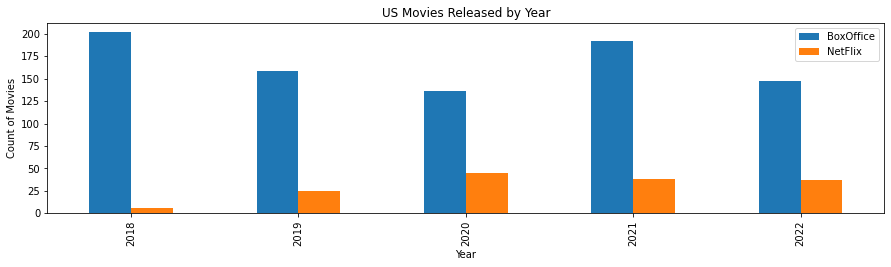

In [4]:
# Movie count 

box_count = box.groupby(["Year"]).count()["Title"]
#box_count

nf_count = nf.groupby(["Year"]).count()["Title"]
#nf_count

movie_count_df = pd.DataFrame({"BoxOffice": box_count, "NetFlix": nf_count})
#movie_count_df

movie_count_df.plot(kind="bar", figsize=(15,3.5))
plt.title("US Movies Released by Year")
plt.xlabel("Year")
plt.ylabel("Count of Movies")
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

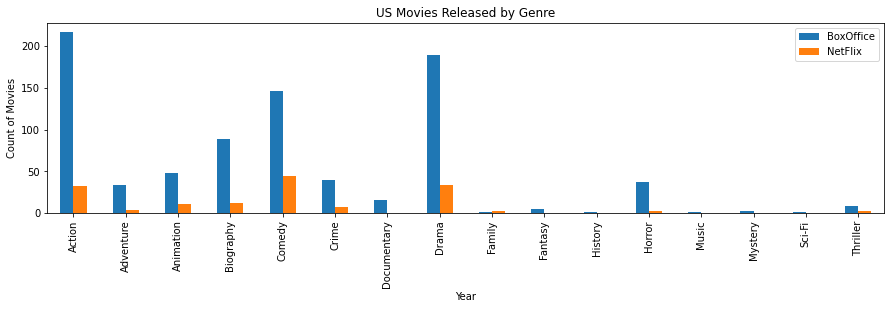

In [5]:
# Movie count - by genre 

box_count_genre = box.groupby(["Genre"]).count()["Title"]
#box_count_genre

nf_count_genre = nf.groupby(["Genre"]).count()["Title"]
#nf_count_genre

movie_genre_df = pd.DataFrame({"BoxOffice": box_count_genre, "NetFlix": nf_count_genre})
#movie_count_df

movie_genre_df.plot(kind="bar", figsize=(15,3.5))
plt.title("US Movies Released by Genre")
plt.xlabel("Year")
plt.ylabel("Count of Movies")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

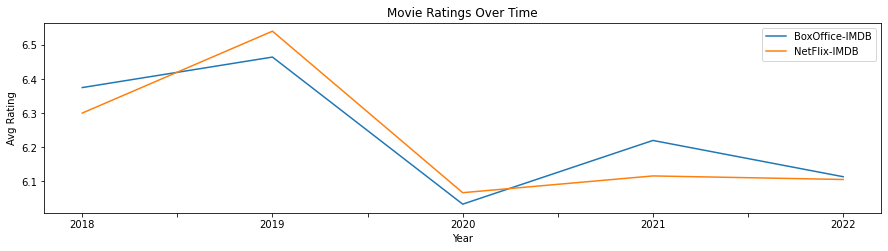

In [6]:
# IMDB Ratings 

box_imdb = box.groupby(["Year"]).mean()["imdbRating"] 
#box_imdb

nf_imdb = nf.groupby(["Year"]).mean()["imdbRating"] 
#nf_imdb

imdb_df = pd.DataFrame({"BoxOffice-IMDB": box_imdb, "NetFlix-IMDB": nf_imdb})
#imdb_df

imdb_df.plot(kind="line", figsize=(15,3.5))
plt.title("Movie Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Rating")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

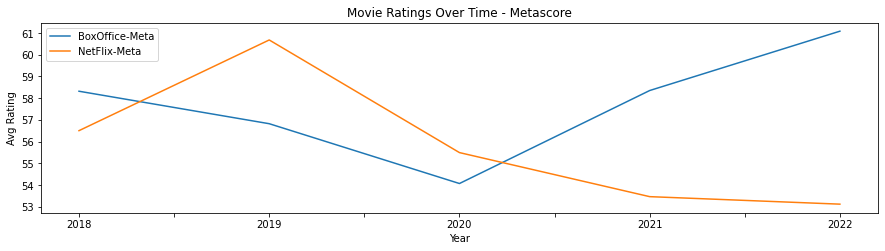

In [7]:
# Meta Ratings 

box_meta = box.groupby(["Year"]).mean()["Metascore"]
#box_meta

nf_meta = nf.groupby(["Year"]).mean()["Metascore"] 
#nf_meta

meta_df = pd.DataFrame({"BoxOffice-Meta": box_meta, "NetFlix-Meta": nf_meta})
#meta_df

meta_df.plot(kind="line", figsize=(15,3.5))
plt.title("Movie Ratings Over Time - Metascore")
plt.xlabel("Year")
plt.ylabel("Avg Rating")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

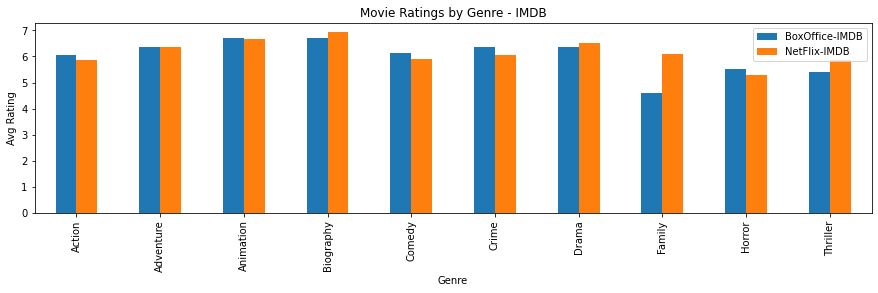

In [8]:
# IMDB Ratings - by genre

box_genre_total_imdb = box.groupby(["Genre",]).mean()["imdbRating"]
#box_genre_total_imdb

nf_genre_total_imdb = nf.groupby(["Genre",]).mean()["imdbRating"]
#nf_genre_total_imdb

imdb_genre_total_imdb_df = pd.DataFrame({"BoxOffice-IMDB": box_genre_total_imdb, "NetFlix-IMDB": nf_genre_total_imdb})
#imdb_genre_total_imdb_df

imdb_good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Horror", "Thriller"]
imdb_genre_total_good_df = imdb_genre_total_imdb_df.loc[imdb_good, :]
#imdb_genre_total_good_df

imdb_genre_total_good_df.plot(kind="bar", figsize=(15,3.5))
plt.title("Movie Ratings by Genre - IMDB")
plt.xlabel("Genre")
plt.ylabel("Avg Rating")
plt.show





In [9]:
# # IMBD Ratings - by genre by year

# box_imdb_genre = box.groupby(["Genre", "Year"]).mean()["imdbRating"]
# #box_imdb_genre

# nf_imdb_genre = nf.groupby(["Genre", "Year"]).mean()["imdbRating"]
# #nf_imdb_genre

# imdb_genre_df = pd.DataFrame({"BoxOffice-IMDB": box_imdb_genre, "NetFlix-IMDB": nf_imdb_genre})
# imdb_genre_df

# imdb_genre_df.plot(kind="line", figsize=(15,3.5))
# plt.title("Movie Ratings Over Time")
# plt.xlabel("Year")
# plt.ylabel("Avg Rating")
# plt.show


<function matplotlib.pyplot.show(*args, **kw)>

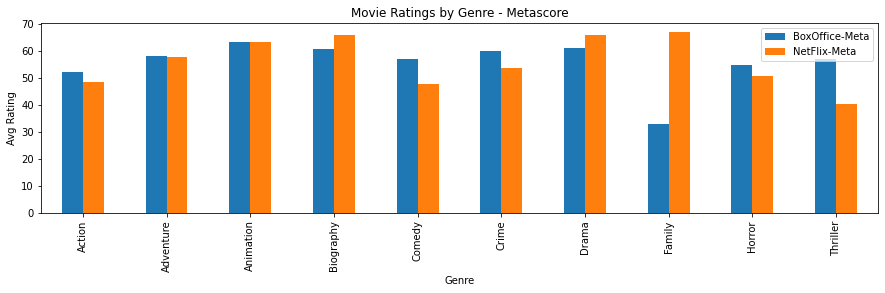

In [10]:
# Meta Ratings - by genre

box_genre_total_meta = box.groupby(["Genre",]).mean()["Metascore"]
#box_genre_total_meta

nf_genre_total_meta = nf.groupby(["Genre",]).mean()["Metascore"]
#nf_genre_total_meta

meta_genre_total_df = pd.DataFrame({"BoxOffice-Meta": box_genre_total_meta, "NetFlix-Meta": nf_genre_total_meta})
meta_genre_total_df

meta_good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Horror", "Thriller"]
meta_genre_total_good_df = meta_genre_total_df.loc[meta_good, :]
meta_genre_total_good_df

meta_genre_total_good_df.plot(kind="bar", figsize=(15,3.5))
plt.title("Movie Ratings by Genre - Metascore")
plt.xlabel("Genre")
plt.ylabel("Avg Rating")
plt.show

In [11]:
# # Meta Ratings - by genre by year

# box_meta_genre = box.groupby(["Genre", "Year"]).mean()["Metascore"]
# #box_meta_genre

# nf_meta_genre = nf.groupby(["Genre", "Year"]).mean()["Metascore"]
# #nf_meta_genre

# meta_genre_df = pd.DataFrame({"BoxOffice-Meta": box_meta_genre, "NetFlix-Meta": nf_meta_genre})
# meta_genre_df

# imdb_genre_df.plot(kind="line", figsize=(15,3.5))
# plt.title("Movie Ratings Over Time")
# plt.xlabel("Year")
# plt.ylabel("Avg Rating")
# plt.show


In [16]:
# Movie count - by family 
fam = ["Family"]

box_count_genre_year = box.groupby(["Genre", "Year"]).count()["Title"]
#box_count_genre_year

nf_count_genre_year = nf.groupby(["Genre", "Year"]).count()["Title"]
#nf_count_genre_year

count_genre_year_df = pd.DataFrame({"BoxOffice-IMDB": box_count_genre_year, "NetFlix-IMDB": nf_count_genre_year})
count_genre_year_df

# count_genre_year_df.plot(kind="line", figsize=(15,3.5))
# plt.title("Movie Ratings Over Time")
# plt.xlabel("Year")
# plt.ylabel("Avg Rating")
# plt.show


BoxOffice-IMDB  NetFlix-IMDB
Genre       Year                              
Action      2018            60.0           3.0
            2019            40.0           4.0
            2020            32.0           6.0
            2021            46.0          10.0
            2022            39.0           9.0
Adventure   2018            14.0           1.0
            2019            10.0           NaN
            2020             3.0           2.0
            2021             6.0           NaN
            2022             1.0           1.0
Animation   2018             9.0           NaN
            2019            10.0           1.0
            2020             4.0           2.0
            2021            13.0           3.0
            2022            12.0           5.0
Biography   2018            27.0           NaN
            2019            22.0           6.0
            2020            10.0           2.0
            2021            22.0           1.0
            2022             8.0           3.0
Comedy      2018            41.0           1.0
            2019            27.0           7.0
            2020            24.0          15.0
            2021            26.0          10.0
            2022            28.0          11.0
Crime       2018             9.0           NaN
            2019             7.0           NaN
            2020             5.0           2.0
            2021            14.0           4.0
            2022             5.0           1.0
Documentary 2018             3.0           NaN
            2021            10.0           NaN
            2022             3.0           NaN
Drama       2018            33.0           1.0
            2019            34.0           4.0
            2020            43.0          13.0
            2021            46.0           8.0
            2022            33.0           7.0
Family      2020             NaN           1.0
            2021             NaN           1.0
            2022             1.0           NaN
Fantasy     2019             1.0           NaN
            2020             2.0           NaN
            2021             1.0           NaN
            2022             1.0           NaN
History     2021             1.0           NaN
Horror      2018             5.0           NaN
            2019             7.0           2.0
            2020             9.0           NaN
            2021             6.0           1.0
            2022            10.0           NaN
Music       2020             1.0           NaN
Mystery     2020             1.0           NaN
            2021             1.0           NaN
            2022             1.0           NaN
Sci-Fi      2018             1.0           NaN
Thriller    2019             1.0           1.0
            2020             2.0           2.0
            2022             6.0           NaN